In [1]:
import pandas as pd
import glob
import numpy as np

In [13]:
def read_k_mers(path):
    list_of_names = glob.glob(path + '/*.csv')
    k_mers = pd.DataFrame()

    for i in range(len(list_of_names)):
        print(list_of_names[i])
        k = list_of_names[i][list_of_names[i].find("\\")+1 : list_of_names[i].find("_mers.csv")]

        temp_df = pd.DataFrame()
        temp_df = pd.read_csv(list_of_names[i]).rename(columns={str(k) + '_mers':'k_mers'})
        temp_df['k'] = int(k)

        k_mers = pd.concat([k_mers, temp_df])

    return k_mers

def count_species(specie1, specie2, k_mers, m, n):
    species = [specie1, specie2]

    k_mers = k_mers[k_mers['Specie_Scaffold'].str.contains('|'.join(species), case=False)]
    
    both = (k_mers['Specie_Scaffold'].str.contains(species[0], case=False)) & (k_mers['Specie_Scaffold'].str.contains(species[1], case=False))
    
    if not k_mers[both].empty == True:

        k_mers.loc[both == False, 'Dim'] = 'One'
        k_mers.loc[both == True, 'Dim'] = 'Both'
        
        k_mers = (k_mers.groupby(['k', 'Dim'], as_index=False)['Scaffolds']
                    .count()
                    .pivot(index='k', columns='Dim', values='Scaffolds')
                    .reset_index())   
        
        # m smaller, n larger
        if n < m: 
            aux = m
            m = n
            n = aux

        k_mers['ratio'] = (1 - (k_mers['Both'] / (k_mers['Both'] + k_mers['One']) ) ) * (1 - (m/(n*k_mers['k']^2))) 

        return 1 - np.nanprod(np.array(k_mers['ratio']))
    else: return 0


In [3]:
k_mers = read_k_mers('../Data/Intermediate/k_mers/Scaffold/15_mers')

../Data/Intermediate/k_mers/Scaffold/15_mers\10_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\11_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\12_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\13_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\14_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\15_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\16_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\17_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\18_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\19_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\20_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\21_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\22_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\23_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\24_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\25_mers.csv
../Data/Intermediate/k_mers/Scaffold/15_mers\26_mers.csv
../Data/Intermediate/k_mers/Sca

Get the species

In [4]:
filepath = '../Data/Raw/Tables_Filtered_IK_format.xlsx'

# Load Excel file using Pandas with `sheet_name=None`
df_dict = pd.read_excel(filepath, sheet_name=None)

In [5]:
# Data cleaning for each specie
df_species = pd.DataFrame()

species = df_dict.keys()

for s in species:
    aux = df_dict.get(s)
    aux['Specie'] = s
    df_species = pd.concat([df_species, aux])

In [6]:
species = sorted(df_species['Specie'].unique())
species

['Aadvark',
 'Alligator M',
 'Alligator S',
 'Anolis',
 'Chelonia',
 'Chrysemys',
 'Croco',
 'Danio',
 'Devil',
 'Dog',
 'Fugu',
 'Gecko',
 'Gorilla',
 'Human',
 'KCobra',
 'Koala',
 'Monodelphis',
 'Mouse',
 'Orca',
 'Ostrich',
 'Papio',
 'Pelodiscus',
 'Pigeon',
 'Platypus',
 'Pogona',
 'Python',
 'Thamnophis',
 'Xenopus',
 'Xlaevis',
 'Xtropicalis']

In [12]:
df_species[df_species['Specie'] == species[0]].count()[0]

19630

In [15]:
metric = []

for index_sp1 in range(len(species)-1):
    sp1 = species[index_sp1]
    len_sp1 = df_species[df_species['Specie'] == sp1].count()[0]
    for index_sp2 in range(index_sp1+1, len(species)):
        sp2 = species[index_sp2]
        len_sp2 = df_species[df_species['Specie'] == sp2].count()[0]

        current = { 
                    'Specie1': sp1,
                    'Specie2': sp2,
                    'Ratio': count_species(sp1, sp2, k_mers, len_sp1, len_sp2)
                }
        print(current)
        
        metric.append(current)
metric = pd.DataFrame(metric)

# Mirar Danio

C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Alligator M', 'Ratio': 0.971412206639955}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Alligator S', 'Ratio': 0.960878643985521}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Anolis', 'Ratio': 0.9565160047762064}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Chelonia', 'Ratio': 0.9697416258056176}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Chrysemys', 'Ratio': 0.9823651380727905}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Croco', 'Ratio': 0.9322202539809848}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Danio', 'Ratio': 0.6322748503172402}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Devil', 'Ratio': 0.9692233389525159}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Dog', 'Ratio': 0.6508240190786169}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Fugu', 'Ratio': 0.48464153298762414}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Gecko', 'Ratio': 0.9530393407399823}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Gorilla', 'Ratio': 0.9864373731230437}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Human', 'Ratio': 0.9806842816853969}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'KCobra', 'Ratio': 0.871411406426674}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Koala', 'Ratio': 0.985737028691123}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Monodelphis', 'Ratio': 0.9840031103132143}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Mouse', 'Ratio': 0.7891574682380228}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Orca', 'Ratio': 0.998850770873822}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Ostrich', 'Ratio': 0.9076874308229097}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Papio', 'Ratio': 0.9849461395563983}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Pelodiscus', 'Ratio': 0.9670960307628836}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Pigeon', 'Ratio': 0.7151069476662975}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Platypus', 'Ratio': 0.9362724986183599}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Pogona', 'Ratio': 0.961465096393456}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Python', 'Ratio': 0.8833463861439066}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Thamnophis', 'Ratio': 0.7842222602152729}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Xenopus', 'Ratio': 0.8014547725788965}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Xlaevis', 'Ratio': 0.29783171344700166}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Aadvark', 'Specie2': 'Xtropicalis', 'Ratio': 0.9318314435127512}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Alligator S', 'Ratio': 0.9941818928124305}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Anolis', 'Ratio': 0.978304118086293}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Chelonia', 'Ratio': 0.963182457639987}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Chrysemys', 'Ratio': 0.9659271275609772}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Croco', 'Ratio': 0.9967483488864296}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Danio', 'Ratio': 0.6126229026560526}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Devil', 'Ratio': 0.9502382845916448}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Dog', 'Ratio': 0.6494842990413852}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Fugu', 'Ratio': 0.4827981090067286}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Gecko', 'Ratio': 0.9742366356068637}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Gorilla', 'Ratio': 0.9628821255224196}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Human', 'Ratio': 0.9491509736546753}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'KCobra', 'Ratio': 0.8468316343823444}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Koala', 'Ratio': 0.9885120430476607}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Monodelphis', 'Ratio': 0.9777726613148011}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Mouse', 'Ratio': 0.6967425185393237}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Orca', 'Ratio': 0.9760403189450665}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Ostrich', 'Ratio': 0.9576674465785673}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Papio', 'Ratio': 0.9647538814748227}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Pelodiscus', 'Ratio': 0.987505634085098}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Pigeon', 'Ratio': 0.66590340877223}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Platypus', 'Ratio': 0.9630750731699611}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Pogona', 'Ratio': 0.9847625445665085}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Python', 'Ratio': 0.8992145555386744}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Thamnophis', 'Ratio': 0.8369796143988819}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Xenopus', 'Ratio': 0.8006627901679055}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Xlaevis', 'Ratio': 0.3321685031617607}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator M', 'Specie2': 'Xtropicalis', 'Ratio': 0.9404138987525891}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Anolis', 'Ratio': 0.960146518578119}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Chelonia', 'Ratio': 0.9695483729082766}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Chrysemys', 'Ratio': 0.972958245114511}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Croco', 'Ratio': 0.9754794424983025}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Danio', 'Ratio': 0.5375612012011668}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Devil', 'Ratio': 0.9251739445160069}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Dog', 'Ratio': 0.6321260887001245}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Fugu', 'Ratio': 0.4681125600091458}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Gecko', 'Ratio': 0.9742656312831527}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Gorilla', 'Ratio': 0.9250806651242938}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Human', 'Ratio': 0.9014214072818655}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'KCobra', 'Ratio': 0.8469200501303155}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Koala', 'Ratio': 0.9496731922857595}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Monodelphis', 'Ratio': 0.923139427106639}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Mouse', 'Ratio': 0.6671016757433845}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Orca', 'Ratio': 0.9668903743410331}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Ostrich', 'Ratio': 0.957237110356545}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Papio', 'Ratio': 0.9305087909214985}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Pelodiscus', 'Ratio': 0.9888916437872034}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Pigeon', 'Ratio': 0.6980915015419854}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Platypus', 'Ratio': 0.9369104008464498}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Pogona', 'Ratio': 0.9713706226892741}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Python', 'Ratio': 0.9079560691311375}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Thamnophis', 'Ratio': 0.8081284986042394}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Xenopus', 'Ratio': 0.7516731310898441}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Xlaevis', 'Ratio': 0.32180327464017655}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Alligator S', 'Specie2': 'Xtropicalis', 'Ratio': 0.9256061717647449}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Chelonia', 'Ratio': 0.9439395093450683}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Chrysemys', 'Ratio': 0.9508940246094575}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Croco', 'Ratio': 0.9632990261161181}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Danio', 'Ratio': 0.5835494654398088}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Devil', 'Ratio': 0.9545974305288119}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Dog', 'Ratio': 0.6507500555422958}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Fugu', 'Ratio': 0.5315296744205847}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Gecko', 'Ratio': 0.9455515866152594}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Gorilla', 'Ratio': 0.9460367836278304}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Human', 'Ratio': 0.9235025495799649}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'KCobra', 'Ratio': 0.8574830488680409}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Koala', 'Ratio': 0.9720541962708588}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Monodelphis', 'Ratio': 0.9683034654265024}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Mouse', 'Ratio': 0.6340863705729263}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Orca', 'Ratio': 0.9646504064849912}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Ostrich', 'Ratio': 0.9434877846032024}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Papio', 'Ratio': 0.9566742231760512}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Pelodiscus', 'Ratio': 0.964391658656436}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Pigeon', 'Ratio': 0.6674492066201886}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Platypus', 'Ratio': 0.9551547133703274}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Pogona', 'Ratio': 0.9827800138009497}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Python', 'Ratio': 0.921537871055337}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Thamnophis', 'Ratio': 0.8121670011532812}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Xenopus', 'Ratio': 0.7838210301724341}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Xlaevis', 'Ratio': 0.2971567263213424}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Anolis', 'Specie2': 'Xtropicalis', 'Ratio': 0.9167238373285664}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Chrysemys', 'Ratio': 0.9701724475331267}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Croco', 'Ratio': 0.9512329081899193}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Danio', 'Ratio': 0.5720795799582702}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Devil', 'Ratio': 0.911905976362652}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Dog', 'Ratio': 0.6094007035656837}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Fugu', 'Ratio': 0.44879626699022956}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Gecko', 'Ratio': 0.9158253394044628}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Gorilla', 'Ratio': 0.9271553899727393}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Human', 'Ratio': 0.8980799060552088}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'KCobra', 'Ratio': 0.8567511940045109}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Koala', 'Ratio': 0.9341346827623542}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Monodelphis', 'Ratio': 0.9187280783493613}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Mouse', 'Ratio': 0.6268746744550195}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Orca', 'Ratio': 0.9781666876594544}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Ostrich', 'Ratio': 0.9511829107134614}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Papio', 'Ratio': 0.9284878369385653}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Pelodiscus', 'Ratio': 0.977842453664093}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Pigeon', 'Ratio': 0.626003481299888}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Platypus', 'Ratio': 0.9219295069991746}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Pogona', 'Ratio': 0.9293662174898519}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Python', 'Ratio': 0.8986501482888889}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Thamnophis', 'Ratio': 0.8106938920833436}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Xenopus', 'Ratio': 0.7661343362403801}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Xlaevis', 'Ratio': 0.23459773455838528}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chelonia', 'Specie2': 'Xtropicalis', 'Ratio': 0.9201460490754441}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Croco', 'Ratio': 0.950449564644914}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Danio', 'Ratio': 0.6475467140146529}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Devil', 'Ratio': 0.9349796787793362}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Dog', 'Ratio': 0.6394282922806807}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Fugu', 'Ratio': 0.5243118695245133}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Gecko', 'Ratio': 0.9405149735005124}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Gorilla', 'Ratio': 0.9510781243947333}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Human', 'Ratio': 0.9420494152029907}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'KCobra', 'Ratio': 0.8275540788403069}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Koala', 'Ratio': 0.9703480555111275}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Monodelphis', 'Ratio': 0.9676039690386968}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Mouse', 'Ratio': 0.686168493561271}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Orca', 'Ratio': 0.9749204081982308}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Ostrich', 'Ratio': 0.9253142989688473}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Papio', 'Ratio': 0.9674648580109352}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Pelodiscus', 'Ratio': 0.9745341933590006}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Pigeon', 'Ratio': 0.673364865256207}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Platypus', 'Ratio': 0.9207467626230862}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Pogona', 'Ratio': 0.946438769915284}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Python', 'Ratio': 0.8859389768550433}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Thamnophis', 'Ratio': 0.8436401968305168}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Xenopus', 'Ratio': 0.833798113977755}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Xlaevis', 'Ratio': 0.2792011023086417}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Chrysemys', 'Specie2': 'Xtropicalis', 'Ratio': 0.9348572079004818}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Danio', 'Ratio': 0.57016948642947}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Devil', 'Ratio': 0.90685590398917}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Dog', 'Ratio': 0.5406596537536044}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Fugu', 'Ratio': 0.39162846724090483}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Gecko', 'Ratio': 0.9072707858016205}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Gorilla', 'Ratio': 0.9436117374943886}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Human', 'Ratio': 0.9282033937982784}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'KCobra', 'Ratio': 0.8486677670338035}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Koala', 'Ratio': 0.9669369125461956}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Monodelphis', 'Ratio': 0.9577331104125949}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Mouse', 'Ratio': 0.6899492225870614}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Orca', 'Ratio': 0.9587416931476638}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Ostrich', 'Ratio': 0.9831379895040666}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Papio', 'Ratio': 0.9332856904834319}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Pelodiscus', 'Ratio': 0.9758178621054757}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Pigeon', 'Ratio': 0.5561210809480013}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Platypus', 'Ratio': 0.8928223361794534}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Pogona', 'Ratio': 0.9742041875337993}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Python', 'Ratio': 0.8694923115447462}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Thamnophis', 'Ratio': 0.6818882228127546}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Xenopus', 'Ratio': 0.7130138410709737}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Xlaevis', 'Ratio': 0.26776815516228336}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Croco', 'Specie2': 'Xtropicalis', 'Ratio': 0.8960171627816444}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Devil', 'Ratio': 0.6286251715557643}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Dog', 'Ratio': 0.46956577624550655}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Fugu', 'Ratio': 0.7243904674989018}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Gecko', 'Ratio': 0.512348601335419}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Gorilla', 'Ratio': 0.6769406404009353}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Human', 'Ratio': 0.7344648897500436}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'KCobra', 'Ratio': 0.5207878957263667}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Koala', 'Ratio': 0.6321948287227059}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Monodelphis', 'Ratio': 0.7025096369438641}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Mouse', 'Ratio': 0.511216374690586}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Orca', 'Ratio': 0.6263454356861354}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Ostrich', 'Ratio': 0.530593412998966}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Papio', 'Ratio': 0.7024150731695763}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Pelodiscus', 'Ratio': 0.6116295597446504}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Pigeon', 'Ratio': 0.4560062211581086}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Platypus', 'Ratio': 0.6085269675659398}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Pogona', 'Ratio': 0.623533783423136}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Python', 'Ratio': 0.5323029467257463}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Thamnophis', 'Ratio': 0.6410926887709766}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Xenopus', 'Ratio': 0.597864971011144}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Xlaevis', 'Ratio': 0.39506021744375386}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Danio', 'Specie2': 'Xtropicalis', 'Ratio': 0.6852601959762112}
{'Specie1': 'Devil', 'Specie2': 'Dog', 'Ratio': 0}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Fugu', 'Ratio': 0.42151831283507335}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Gecko', 'Ratio': 0.9033433151903019}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Gorilla', 'Ratio': 0.9704857697708578}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Human', 'Ratio': 0.9551936919018295}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'KCobra', 'Ratio': 0.8440217777145833}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Koala', 'Ratio': 0.9804865642198686}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Monodelphis', 'Ratio': 0.9966191559986509}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Mouse', 'Ratio': 0.6201548935979699}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Orca', 'Ratio': 0.9600974200400577}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Ostrich', 'Ratio': 0.8634852169307843}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Papio', 'Ratio': 0.966537908721098}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Pelodiscus', 'Ratio': 0.9534753246849377}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Pigeon', 'Ratio': 0.5996544706233802}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Platypus', 'Ratio': 0.9216420659218547}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Pogona', 'Ratio': 0.9560107513419565}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Python', 'Ratio': 0.8605893026968534}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Thamnophis', 'Ratio': 0.8163285304413588}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Xenopus', 'Ratio': 0.7975386781535604}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Xlaevis', 'Ratio': 0.29704330207086416}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Devil', 'Specie2': 'Xtropicalis', 'Ratio': 0.8881568639783025}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Fugu', 'Ratio': 0.5012551964340436}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Gecko', 'Ratio': 0.6493644189294203}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Gorilla', 'Ratio': 0.633646324810409}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Human', 'Ratio': 0.6188761417297619}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'KCobra', 'Ratio': 0.45984178272295406}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Koala', 'Ratio': 0.6614245478267908}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Monodelphis', 'Ratio': 0.644265625911697}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Mouse', 'Ratio': 0.22691489679784482}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Orca', 'Ratio': 0.7986205993634194}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Ostrich', 'Ratio': 0.7185439211126688}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Papio', 'Ratio': 0.7408948787784341}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Pelodiscus', 'Ratio': 0.6497062248232346}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Pigeon', 'Ratio': 0.687511529723428}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Platypus', 'Ratio': 0.6571520779462479}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Pogona', 'Ratio': 0.5767843779562218}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Python', 'Ratio': 0.3087808513028564}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Thamnophis', 'Ratio': 0.41806285975141066}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Xenopus', 'Ratio': 0.3025688748230815}
{'Specie1': 'Dog', 'Specie2': 'Xlaevis', 'Ratio': 0}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Dog', 'Specie2': 'Xtropicalis', 'Ratio': 0.6425506592633706}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Gecko', 'Ratio': 0.48347294741307645}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Gorilla', 'Ratio': 0.5269795902189989}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Human', 'Ratio': 0.589127553203554}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'KCobra', 'Ratio': 0.4009314303080145}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Koala', 'Ratio': 0.5030926292037287}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Monodelphis', 'Ratio': 0.5185217624853374}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Mouse', 'Ratio': 0.33083478030656455}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Orca', 'Ratio': 0.4607539378213027}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Ostrich', 'Ratio': 0.3876499718975134}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Papio', 'Ratio': 0.5357650386609785}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Pelodiscus', 'Ratio': 0.4839585650192174}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Pigeon', 'Ratio': 0.4868961590125216}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Platypus', 'Ratio': 0.48888915466709904}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Pogona', 'Ratio': 0.5612295425794223}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Python', 'Ratio': 0.4094175330143739}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Thamnophis', 'Ratio': 0.513746329114615}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Xenopus', 'Ratio': 0.37943764979723804}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Xlaevis', 'Ratio': 0.29440738273171696}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Fugu', 'Specie2': 'Xtropicalis', 'Ratio': 0.5203259788937613}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Gorilla', 'Ratio': 0.9188302601741466}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Human', 'Ratio': 0.8883148283508541}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'KCobra', 'Ratio': 0.8793382944142838}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Koala', 'Ratio': 0.923385370064998}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Monodelphis', 'Ratio': 0.9180599227935794}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Mouse', 'Ratio': 0.5646882135035002}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Orca', 'Ratio': 0.9498292143438325}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Ostrich', 'Ratio': 0.8827362496643237}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Papio', 'Ratio': 0.9219115175908188}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Pelodiscus', 'Ratio': 0.9472704132629111}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Pigeon', 'Ratio': 0.6662885897765337}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Platypus', 'Ratio': 0.885049010438734}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Pogona', 'Ratio': 0.9713574131729804}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Python', 'Ratio': 0.933487852545806}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Thamnophis', 'Ratio': 0.784741755955129}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Xenopus', 'Ratio': 0.7363146598865524}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Xlaevis', 'Ratio': 0.2956512037823751}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gecko', 'Specie2': 'Xtropicalis', 'Ratio': 0.8899031982041179}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Human', 'Ratio': 0.9999781438930434}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'KCobra', 'Ratio': 0.8502496223473577}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Koala', 'Ratio': 0.9895243858871192}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Monodelphis', 'Ratio': 0.9941374339290086}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Mouse', 'Ratio': 0.8312488272009906}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Orca', 'Ratio': 0.9890194860749562}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Ostrich', 'Ratio': 0.8939930138972535}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Papio', 'Ratio': 0.9998898554297471}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Pelodiscus', 'Ratio': 0.9549885005221266}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Pigeon', 'Ratio': 0.6180008149687855}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Platypus', 'Ratio': 0.956334798162049}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Pogona', 'Ratio': 0.9501834208931739}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Python', 'Ratio': 0.8390516505908421}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Thamnophis', 'Ratio': 0.8501343281981709}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Xenopus', 'Ratio': 0.8386026286404749}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Xlaevis', 'Ratio': 0.3286515912049853}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Gorilla', 'Specie2': 'Xtropicalis', 'Ratio': 0.939762590623445}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'KCobra', 'Ratio': 0.8031816076442235}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Koala', 'Ratio': 0.9846394346588723}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Monodelphis', 'Ratio': 0.9930404654469541}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Mouse', 'Ratio': 0.9007563708201939}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Orca', 'Ratio': 0.9825254361953649}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Ostrich', 'Ratio': 0.8678103380469281}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Papio', 'Ratio': 0.9999704832988435}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Pelodiscus', 'Ratio': 0.9393026946989789}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Pigeon', 'Ratio': 0.6039068505227687}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Platypus', 'Ratio': 0.9038447534731238}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Pogona', 'Ratio': 0.9222961509258721}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Python', 'Ratio': 0.8135234704020687}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Thamnophis', 'Ratio': 0.8272983743900166}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Xenopus', 'Ratio': 0.7861179051031808}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Xlaevis', 'Ratio': 0.4135992123798554}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Human', 'Specie2': 'Xtropicalis', 'Ratio': 0.9296838737162094}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Koala', 'Ratio': 0.8703215861901812}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Monodelphis', 'Ratio': 0.8253769002596474}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Mouse', 'Ratio': 0.3855155267280185}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Orca', 'Ratio': 0.8615211320783671}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Ostrich', 'Ratio': 0.7469819204201285}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Papio', 'Ratio': 0.8101660421423245}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Pelodiscus', 'Ratio': 0.8316387382411297}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Pigeon', 'Ratio': 0.6896701445016042}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Platypus', 'Ratio': 0.7623820388224005}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Pogona', 'Ratio': 0.8788828335759884}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Python', 'Ratio': 0.8510840022525727}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Thamnophis', 'Ratio': 0.6985831689126265}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Xenopus', 'Ratio': 0.6767618231841344}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Xlaevis', 'Ratio': 0.23754959910542595}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'KCobra', 'Specie2': 'Xtropicalis', 'Ratio': 0.8071575800841825}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Monodelphis', 'Ratio': 0.9953474742811023}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Mouse', 'Ratio': 0.7994831250231809}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Orca', 'Ratio': 0.9875329389487926}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Ostrich', 'Ratio': 0.9126493990759524}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Papio', 'Ratio': 0.9861533402110932}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Pelodiscus', 'Ratio': 0.9683649844422874}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Pigeon', 'Ratio': 0.6942276135755746}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Platypus', 'Ratio': 0.9387654226564689}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Pogona', 'Ratio': 0.9859127466239616}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Python', 'Ratio': 0.8726002362353098}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Thamnophis', 'Ratio': 0.835012051759839}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Xenopus', 'Ratio': 0.8046218691785783}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Xlaevis', 'Ratio': 0.31175900902909537}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Koala', 'Specie2': 'Xtropicalis', 'Ratio': 0.956504233687676}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Mouse', 'Ratio': 0.7613594349546908}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Orca', 'Ratio': 0.9825034925736774}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Ostrich', 'Ratio': 0.8957217494593414}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Papio', 'Ratio': 0.9923434375933016}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Pelodiscus', 'Ratio': 0.9666354150664744}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Pigeon', 'Ratio': 0.6290663330359854}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Platypus', 'Ratio': 0.9391846178813635}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Pogona', 'Ratio': 0.9644883301436654}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Python', 'Ratio': 0.8434019343405903}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Thamnophis', 'Ratio': 0.8340880731910217}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Xenopus', 'Ratio': 0.8174232614415088}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Xlaevis', 'Ratio': 0.3213137354323774}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Monodelphis', 'Specie2': 'Xtropicalis', 'Ratio': 0.9580673136802483}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Orca', 'Ratio': 0.8497752745433061}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Ostrich', 'Ratio': 0.5701413394046108}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Papio', 'Ratio': 0.8541687431134694}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Pelodiscus', 'Ratio': 0.682399612506936}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Pigeon', 'Ratio': 0.21965289648157338}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Platypus', 'Ratio': 0.5620532803481697}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Pogona', 'Ratio': 0.6533522277593582}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Python', 'Ratio': 0.47056469114390675}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Thamnophis', 'Ratio': 0.46920652361233794}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Xenopus', 'Ratio': 0.40167432517192225}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Xlaevis', 'Ratio': 0.5377360498005866}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Mouse', 'Specie2': 'Xtropicalis', 'Ratio': 0.6259414237632903}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Orca', 'Specie2': 'Ostrich', 'Ratio': 0.9448048547529009}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Orca', 'Specie2': 'Papio', 'Ratio': 0.985780836718324}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Orca', 'Specie2': 'Pelodiscus', 'Ratio': 0.9775129960308289}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Orca', 'Specie2': 'Pigeon', 'Ratio': 0.6401043768765761}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Orca', 'Specie2': 'Platypus', 'Ratio': 0.9374911020396095}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Orca', 'Specie2': 'Pogona', 'Ratio': 0.9593468258988621}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Orca', 'Specie2': 'Python', 'Ratio': 0.9307659047801106}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Orca', 'Specie2': 'Thamnophis', 'Ratio': 0.7891922259932262}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Orca', 'Specie2': 'Xenopus', 'Ratio': 0.7802869380390552}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Orca', 'Specie2': 'Xlaevis', 'Ratio': 0.28296732163171134}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Orca', 'Specie2': 'Xtropicalis', 'Ratio': 0.9170780556065605}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Ostrich', 'Specie2': 'Papio', 'Ratio': 0.8864320269135477}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Ostrich', 'Specie2': 'Pelodiscus', 'Ratio': 0.9567239071377871}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Ostrich', 'Specie2': 'Pigeon', 'Ratio': 0.5990973581472478}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Ostrich', 'Specie2': 'Platypus', 'Ratio': 0.8994849170703385}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Ostrich', 'Specie2': 'Pogona', 'Ratio': 0.9354778595363654}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Ostrich', 'Specie2': 'Python', 'Ratio': 0.828768512302119}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Ostrich', 'Specie2': 'Thamnophis', 'Ratio': 0.6755855291622257}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Ostrich', 'Specie2': 'Xenopus', 'Ratio': 0.6985266732391608}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Ostrich', 'Specie2': 'Xlaevis', 'Ratio': 0.23462878801357945}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Ostrich', 'Specie2': 'Xtropicalis', 'Ratio': 0.8354633968298494}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Papio', 'Specie2': 'Pelodiscus', 'Ratio': 0.9562059025497294}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Papio', 'Specie2': 'Pigeon', 'Ratio': 0.659273782048723}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Papio', 'Specie2': 'Platypus', 'Ratio': 0.9280873943542448}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Papio', 'Specie2': 'Pogona', 'Ratio': 0.952803577243363}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Papio', 'Specie2': 'Python', 'Ratio': 0.8454359476123849}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Papio', 'Specie2': 'Thamnophis', 'Ratio': 0.7952096173248815}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Papio', 'Specie2': 'Xenopus', 'Ratio': 0.8313279773431272}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Papio', 'Specie2': 'Xlaevis', 'Ratio': 0.3718098021197065}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Papio', 'Specie2': 'Xtropicalis', 'Ratio': 0.9455754375758805}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pelodiscus', 'Specie2': 'Pigeon', 'Ratio': 0.6661913817708152}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pelodiscus', 'Specie2': 'Platypus', 'Ratio': 0.9423161798828855}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pelodiscus', 'Specie2': 'Pogona', 'Ratio': 0.9601046884453479}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pelodiscus', 'Specie2': 'Python', 'Ratio': 0.9081954694715301}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pelodiscus', 'Specie2': 'Thamnophis', 'Ratio': 0.7748532758200508}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pelodiscus', 'Specie2': 'Xenopus', 'Ratio': 0.7423052290202676}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pelodiscus', 'Specie2': 'Xlaevis', 'Ratio': 0.2978485600313525}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pelodiscus', 'Specie2': 'Xtropicalis', 'Ratio': 0.9461965045247838}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pigeon', 'Specie2': 'Platypus', 'Ratio': 0.6614239385557632}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pigeon', 'Specie2': 'Pogona', 'Ratio': 0.708203035685763}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pigeon', 'Specie2': 'Python', 'Ratio': 0.6513707025660649}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pigeon', 'Specie2': 'Thamnophis', 'Ratio': 0.40511623174298406}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pigeon', 'Specie2': 'Xenopus', 'Ratio': 0.44643617655656465}
{'Specie1': 'Pigeon', 'Specie2': 'Xlaevis', 'Ratio': 0}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pigeon', 'Specie2': 'Xtropicalis', 'Ratio': 0.6269546422597794}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Platypus', 'Specie2': 'Pogona', 'Ratio': 0.9317896137024927}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Platypus', 'Specie2': 'Python', 'Ratio': 0.8380036654385108}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Platypus', 'Specie2': 'Thamnophis', 'Ratio': 0.7801877847861746}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Platypus', 'Specie2': 'Xenopus', 'Ratio': 0.7634824213657566}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Platypus', 'Specie2': 'Xlaevis', 'Ratio': 0.2982757364548767}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Platypus', 'Specie2': 'Xtropicalis', 'Ratio': 0.8900878441756152}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pogona', 'Specie2': 'Python', 'Ratio': 0.9305318744042915}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pogona', 'Specie2': 'Thamnophis', 'Ratio': 0.7428783952709255}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pogona', 'Specie2': 'Xenopus', 'Ratio': 0.8205012094617439}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pogona', 'Specie2': 'Xlaevis', 'Ratio': 0.3290213492960258}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Pogona', 'Specie2': 'Xtropicalis', 'Ratio': 0.9093270869198199}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Python', 'Specie2': 'Thamnophis', 'Ratio': 0.8169351107417107}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Python', 'Specie2': 'Xenopus', 'Ratio': 0.6919541965434599}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Python', 'Specie2': 'Xlaevis', 'Ratio': 0.28713546338493723}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Python', 'Specie2': 'Xtropicalis', 'Ratio': 0.8641161174700444}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Thamnophis', 'Specie2': 'Xenopus', 'Ratio': 0.6737856738575525}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Thamnophis', 'Specie2': 'Xlaevis', 'Ratio': 0.3128064706494871}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Thamnophis', 'Specie2': 'Xtropicalis', 'Ratio': 0.8070214158543432}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Xenopus', 'Specie2': 'Xlaevis', 'Ratio': 0.556291991026824}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Xenopus', 'Specie2': 'Xtropicalis', 'Ratio': 0.8997840826600726}


C:\Users\bertr\AppData\Local\Temp\ipykernel_27564\1733216645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers.loc[both == False, 'Dim'] = 'One'


{'Specie1': 'Xlaevis', 'Specie2': 'Xtropicalis', 'Ratio': 0.44877040467594176}


In [16]:
(metric.pivot(index='Specie1', columns='Specie2', values='Ratio')
         .to_excel('../Data/Results/Metric/metric_50_m_n.xlsx', sheet_name='k'))

In [ ]:
k_mers['Dim']

0          
1          
2          
3          
4          
         ..
187638     
187639     
187640     
187641     
187642     
Name: Dim, Length: 4335939, dtype: object

In [ ]:
for each in (k_mers['Specie_Scaffold'].str.contains(species[0], case=False)) & (k_mers['Specie_Scaffold'].str.contains(species[1], case=False)) == True :
    k_mers.Iloc[7, each] = 'Both'


AttributeError: 'DataFrame' object has no attribute 'Iloc'

In [ ]:
k_mers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   k       23 non-null     int64  
 1   Both    4 non-null      float64
 2   One     23 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 680.0 bytes


In [ ]:
species = [sp1, sp2]

k_mers_mod = k_mers[k_mers['Specie_Scaffold'].str.contains('|'.join(species), case=False)]
k_mers_mod['Dim'] = np.where((k_mers_mod['Specie_Scaffold'].str.contains(species[0], case=False)) & (k_mers_mod['Specie_Scaffold'].str.contains(species[1], case=False)), 'Both', 'One')


k_mers_group = (k_mers_mod.groupby(['k', 'Dim'], as_index=False)['Scaffolds'] #, 'Dim'
            .count()
            .pivot(index='k', columns='Dim', values='Scaffolds')
            .reset_index())   

k_mers_group['ratio'] = (1 - (k_mers_mod['Both'] / (k_mers_mod['Both'] + k_mers_mod['One']) ) ) * (1 - (1/(k_mers_mod['k']**2))) 


C:\Users\bertr\AppData\Local\Temp\ipykernel_20128\4012499346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mers_mod['Dim'] = np.where((k_mers_mod['Specie_Scaffold'].str.contains(species[0], case=False)) & (k_mers_mod['Specie_Scaffold'].str.contains(species[1], case=False)), 'Both', 'One')


KeyError: 'Both'

In [ ]:
k_mers_group

Dim,k,One
0,3,10698
1,4,10594
2,5,10504
3,6,10426
4,7,10360
5,8,10300
6,9,10251
7,10,10210
8,11,10173
9,12,10139


In [ ]:
k_mers_mod.to_csv('../Data/Intermediate/k_mers_mod.csv')

In [ ]:
k_mers_group['ratio'] = (1 - (k_mers_group['Both'] / (k_mers_group['Both'] + k_mers_group['One']) ) ) * (1 - (1/(k_mers_group['k']**2))) 


KeyError: 'Both'

In [ ]:
k_mers_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   k       23 non-null     int64
 1   One     23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [ ]:
metric[metric['Specie1'].str.contais('human', case=False) & metric['Specie2'].str.contais('gorilla', case=False)]

In [ ]:
# assign dataset names
list_of_names = glob.glob('../Data/Intermediate/k_mers/Scaffold/*.csv')
 
# create empty list
dataframes = pd.DataFrame()
 
# append datasets into the list
for i in range(len(list_of_names)):
    print(list_of_names[i])
    k = list_of_names[i][list_of_names[i].find("\\")+1 : list_of_names[i].find("_mers.csv")]
    temp_df = pd.read_csv(list_of_names[i]).rename(columns={str(k) + '_mers':'k_mers'})
    
    # Keep only some species
    species=['human', 'gorilla'] #aadvark, kcobra
    temp_df[temp_df['Specie_Scaffold'].str.contains('|'.join(species), case=False)]
    
    temp_df['k'] = int(k)
    temp_df['Dim'] = np.where((temp_df['Specie_Scaffold'].str.contains(species[0], case=False)) & (temp_df['Specie_Scaffold'].str.contains(species[1], case=False)), 'Both', 'One')

    temp_df = (temp_df.groupby(['k', 'Dim'], as_index=False)['Scaffolds']
                .count()
                .pivot(index='k', columns='Dim', values='Scaffolds')
                .reset_index())
                #.sort_values('k'))
    dataframes = pd.concat([dataframes, temp_df])

dataframes['k'] = dataframes['k'].astype(int)
dataframes.sort_values('k', inplace=True)

../Data/Intermediate/k_mers/Scaffold\10_mers.csv
../Data/Intermediate/k_mers/Scaffold\11_mers.csv
../Data/Intermediate/k_mers/Scaffold\12_mers.csv
../Data/Intermediate/k_mers/Scaffold\13_mers.csv
../Data/Intermediate/k_mers/Scaffold\14_mers.csv
../Data/Intermediate/k_mers/Scaffold\15_mers.csv
../Data/Intermediate/k_mers/Scaffold\16_mers.csv
../Data/Intermediate/k_mers/Scaffold\17_mers.csv
../Data/Intermediate/k_mers/Scaffold\18_mers.csv
../Data/Intermediate/k_mers/Scaffold\19_mers.csv
../Data/Intermediate/k_mers/Scaffold\20_mers.csv
../Data/Intermediate/k_mers/Scaffold\21_mers.csv
../Data/Intermediate/k_mers/Scaffold\22_mers.csv
../Data/Intermediate/k_mers/Scaffold\23_mers.csv
../Data/Intermediate/k_mers/Scaffold\24_mers.csv
../Data/Intermediate/k_mers/Scaffold\25_mers.csv
../Data/Intermediate/k_mers/Scaffold\26_mers.csv
../Data/Intermediate/k_mers/Scaffold\27_mers.csv
../Data/Intermediate/k_mers/Scaffold\28_mers.csv
../Data/Intermediate/k_mers/Scaffold\29_mers.csv
../Data/Intermediate

In [ ]:
temp_df = pd.read_csv(list_of_names[i]).rename(columns={str(k) + '_mers':'k_mers'})

# Keep only some species
species=['human', 'gorilla']
temp_df[temp_df['Specie_Scaffold'].str.contains('|'.join(species), case=False)]

temp_df['k'] = int(k)
temp_df['Dim'] = np.where((temp_df['Specie_Scaffold'].str.contains(species[0], case=False)) & (temp_df['Specie_Scaffold'].str.contains(species[1], case=False)), 'Both', 'One')


<AxesSubplot:title={'center':'Human and Gorilla scaffolds by number of coincidences'}, xlabel='k'>

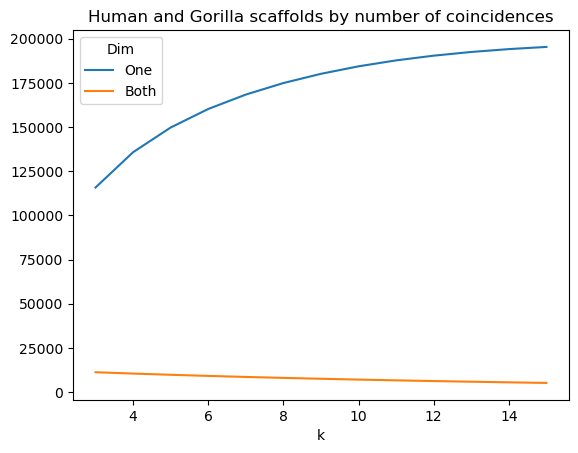

In [ ]:
dataframes.plot.line(x = 'k', y = ['One', 'Both'], title = 'Human and Gorilla scaffolds by number of coincidences')

In [ ]:
dataframes['ratio'] = (1 - (dataframes['Both'] / (dataframes['Both'] + dataframes['One']) ) ) * (1 - (1/(dataframes['k']**2))) 

In [ ]:
dataframes


Dim,k,Both,One,ratio
0,3,11273,115759,0.810008
0,4,10506,135737,0.870151
0,5,9822,149708,0.900894
0,6,9186,160185,0.919493
0,7,8599,168342,0.931986
...,...,...,...,...
0,80,235,160605,0.998383
0,81,223,160152,0.998457
0,82,211,159702,0.998532
0,83,199,159256,0.998607


In [ ]:
np.sum(np.array(dataframes['Both']))
# One : 13924269
# Both : 815911

815911

In [ ]:
1 - np.nanprod(np.array(dataframes['ratio']))
#gorilla = 0.9920312727837575, 0.7742193955397942
#aadvark = 0.9690926583457345, 0.4539702974413118


0.7742193955397942